# Low Birthweight Predictive Model

In [1]:
library(MASS)
library(rpart)

In [3]:
help(birthwt)  # brings up documentation.

In [4]:
str(birthwt)

'data.frame':	189 obs. of  10 variables:
 $ low  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ lwt  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ race : int  2 3 1 1 1 3 1 3 1 1 ...
 $ smoke: int  0 0 1 1 1 0 0 0 1 1 ...
 $ ptl  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ht   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ui   : int  1 0 0 1 1 0 0 0 0 0 ...
 $ ftv  : int  0 3 1 2 0 0 1 1 1 0 ...
 $ bwt  : int  2523 2551 2557 2594 2600 2622 2637 2637 2663 2665 ...


In [5]:
head(birthwt)  # view first few rows.

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


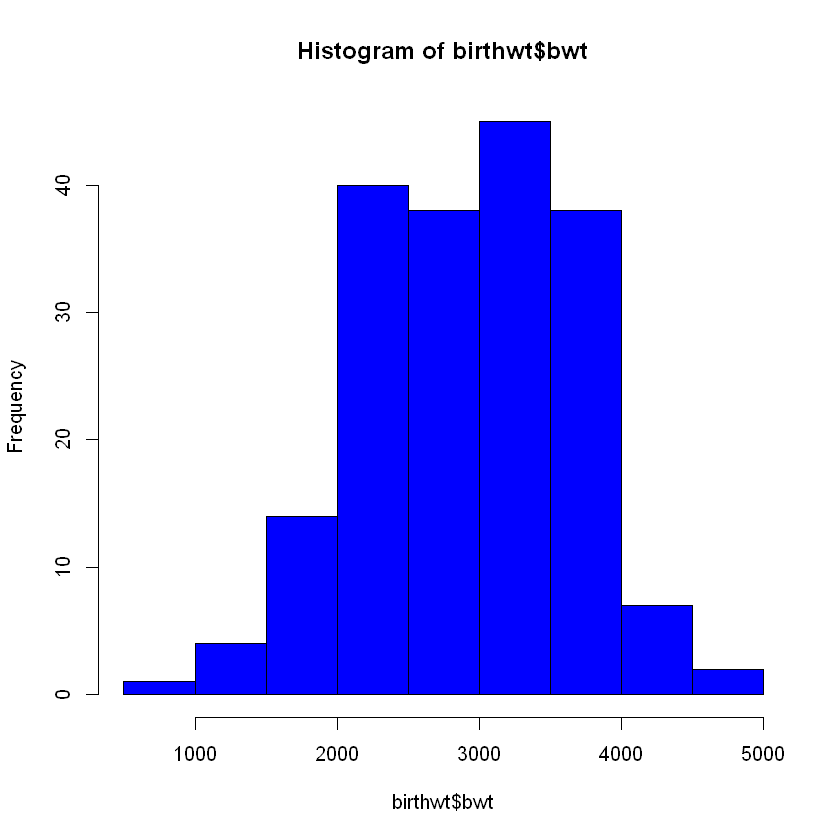

In [6]:
hist(birthwt$bwt, col='blue')  # Histogram 

In [7]:
table(birthwt$low)


  0   1 
130  59 

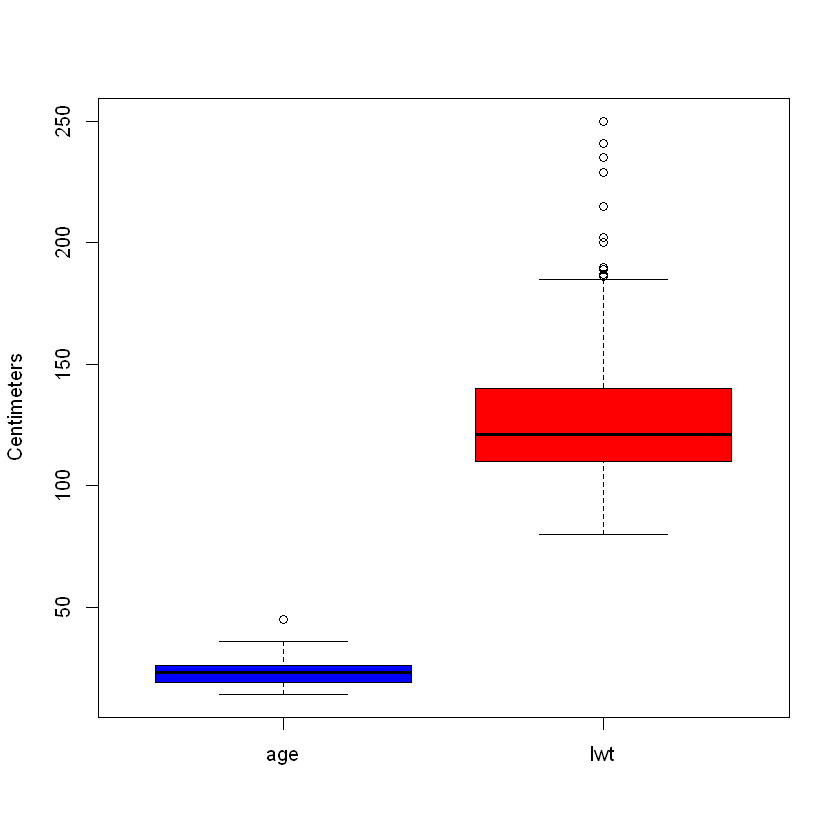

In [8]:
attach(birthwt)
bw_subset <- subset(birthwt, select = c(age,lwt) )
boxplot(bw_subset,col=c("blue","red"),ylab="Centimeters")

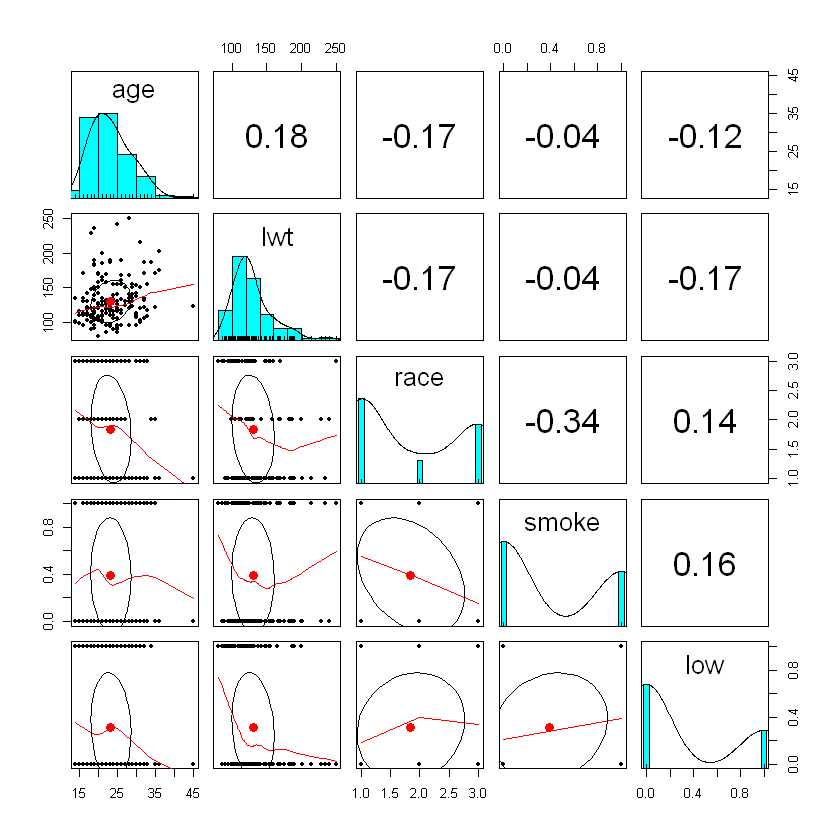

In [9]:
library(psych)
pairs.panels(birthwt[,c('age','lwt','race','smoke','low')])

# Factors are often stored as strings in data so we  need to convert them tofactors to use in a model.  

## Let's convert birthwt string columns to factors...

In [11]:
cols <- c('low', 'race', 'smoke', 'ht', 'ui')
birthwt[cols] <- lapply(birthwt[cols], as.factor)

In [12]:
# Separate training and test data...
set.seed(1)
train <- sample(1:nrow(birthwt), 0.75 * nrow(birthwt))
test = birthwt[-train, ]

In [13]:
# Now, let us build the model. We will use the rpart function for this.
library(rpart)
birthwtTree <- rpart(low ~ . - bwt, data = birthwt[train, ], 
                     method = 'class')

Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


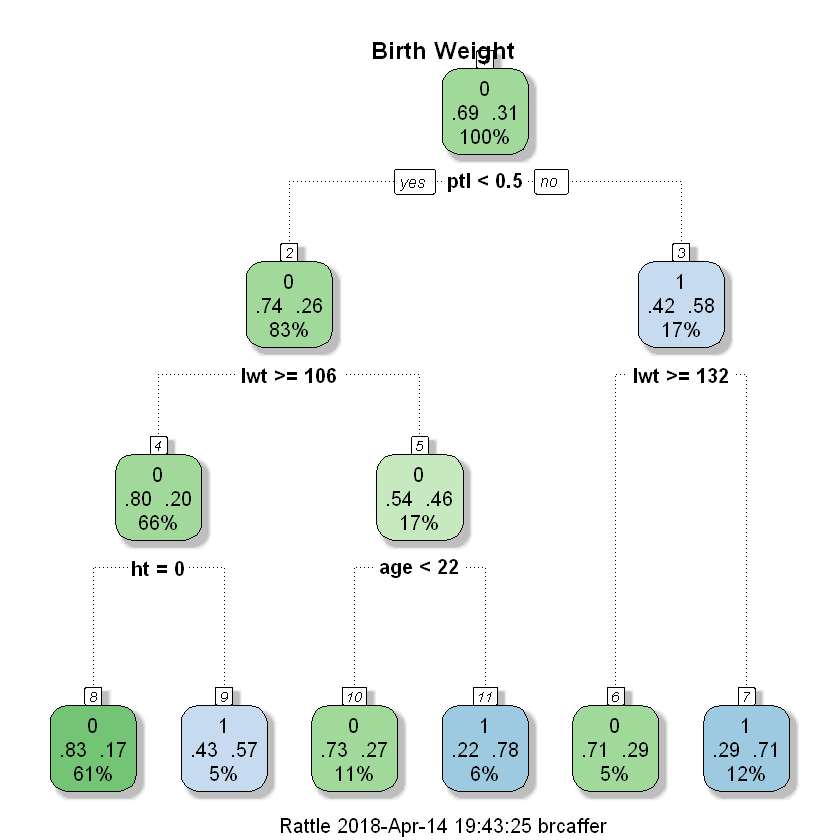

In [14]:
# Nice diagram of the model...
library(rattle)
fancyRpartPlot(birthwtTree, main="Birth Weight")

In [15]:
# Try the model...
#   - next to train is used to get the non training rows.
birthwtPred <- predict(birthwtTree, test, type = 'class')

In [16]:
library(gmodels)
CrossTable(x = test$low, y =  birthwtPred, prop.chisq=FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  48 

 
             | birthwtPred 
    test$low |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        31 |         2 |        33 | 
             |     0.939 |     0.061 |     0.688 | 
             |     0.756 |     0.286 |           | 
             |     0.646 |     0.042 |           | 
-------------|-----------|-----------|-----------|
           1 |        10 |         5 |        15 | 
             |     0.667 |     0.333 |     0.312 | 
             |     0.244 |     0.714 |           | 
             |     0.208 |     0.104 |           | 
-------------|-----------|-----------|-----------|
Column Total |        41 |         7 |        48 | 
             |     0.854 |     0.146 |           | 
-------------|-----